## Demo for modelling single-channel PSF from bead data

#### Setup environment

In [37]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
#main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{psftype}}$:  `'voxel', 'zernike'`  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_user')
```

In [66]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='zernike',channeltype='1ch',sysfile='test_nikon')


#### Edit user defined parameters

In [67]:
L.param.datapath = r'Y:\Projects\DOE Raman HSM\Data\Obj_Test_Microscope/'
L.param.savename = L.param.datapath+'psfmodel'
L.param.keyword = 'bead1' # keyword for your data file
L.param.subfolder = '' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 1.0
L.param.ccd_offset = 700
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 1 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 100 
L.param.roi.bead_radius = 0.0
L.param.batch_size = 30 # lower this number if out of memory
L.param.option.imaging.emission_wavelength = 0.68 # micron
L.param.FOV.y_center = 375
L.param.FOV.x_center = 275
L.param.FOV.radius = 125
L.param.PSFtype = 'pupil_vector'
L.param.roi.peak_height = 0.2
L.param.loss_weight.Inorm = 200.0
L.param.option.model.n_max = 10


#### Start learning

In [68]:
images = L.load_data()

Y:\Projects\DOE Raman HSM\Data\Obj_Test_Microscope\bead1_200nm_redbead_step1um.mat
(1, 11, 658, 496)


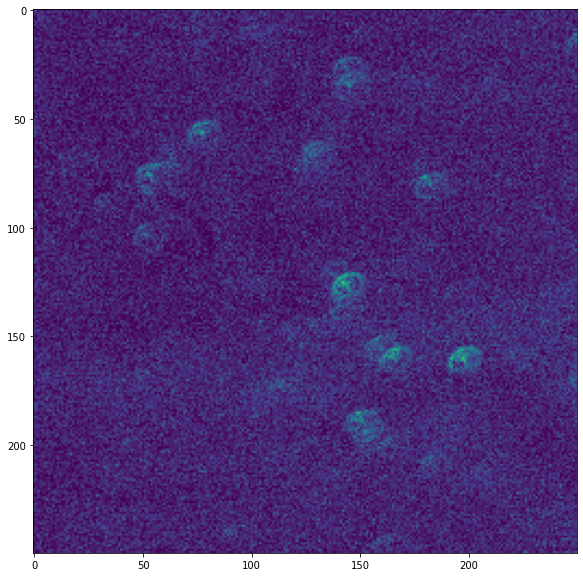

In [41]:
plt.figure(figsize=(10,10))
plt.imshow(images[0,0,250:500,150:400],clim=[0,2000])
#plt.imshow(images[0,0],clim=[0,2000])

In [69]:
#images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
for k in range(0,2): # increase iteration number if necessary
    psfobj,fitter = L.learn_psf(dataobj,time=0)
resfile = L.save_result(psfobj,dataobj,fitter)

rois shape channel : (9, 11, 21, 21)


3/6: learning: 271/? [00:29s]  9.12it/s, current loss: 27.00952, total time: 29.71s      
4/6: calculating spline coefficients: 1/1 [00:00s]  1.94it/s total time: 30.22s
5/6: localization: 30/30 [00:01s] 18.94it/s total time: 31.81s


outlier id: []


3/6: learning: 271/? [00:29s]  9.07it/s, current loss: 27.00952, total time: 29.86s      
4/6: calculating spline coefficients: 1/1 [00:00s]  1.80it/s total time: 30.41s
5/6: localization: 30/30 [00:01s] 18.19it/s total time: 32.06s


outlier id: []


6/6: saving results: [00:01s] total time: 33.78s


#### Show results

In [70]:
f,p = io.h5.load(resfile) # load result file

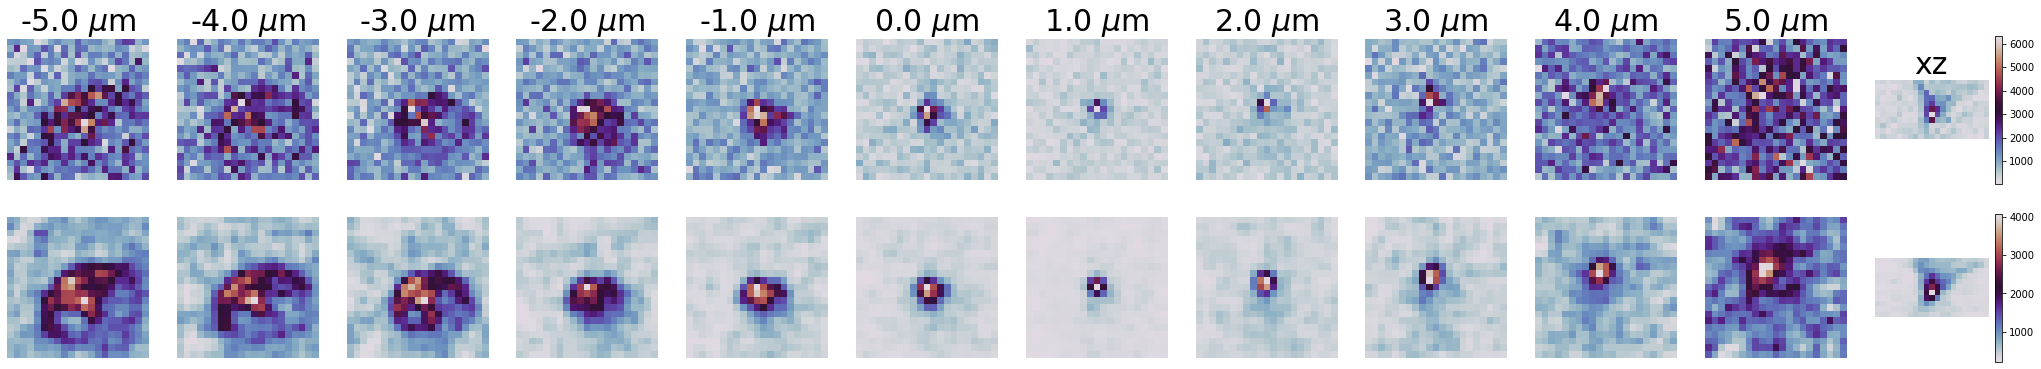

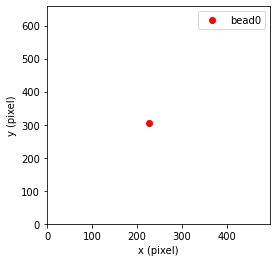

In [91]:
showpsfvsdata(f,p,index=0,step=1)

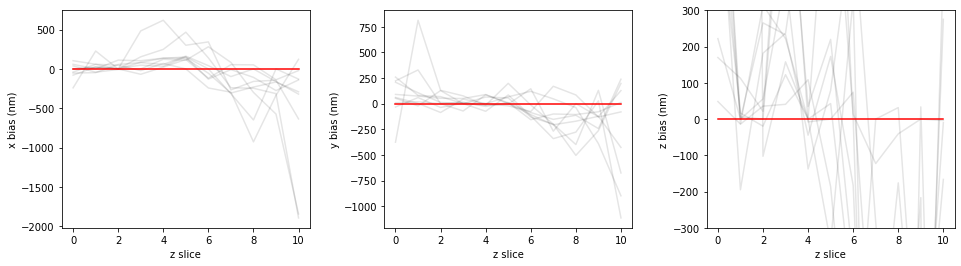

In [82]:
showlocalization(f,p)

#### Optional plots

<Figure size 720x576 with 0 Axes>

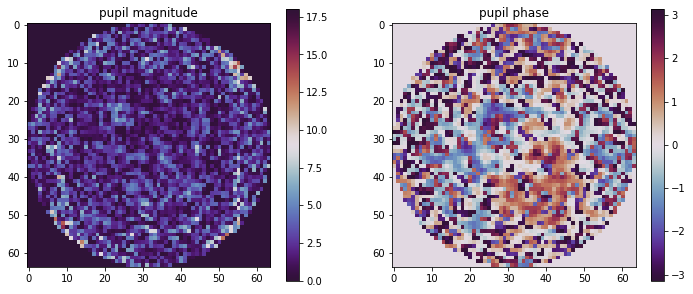

In [83]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

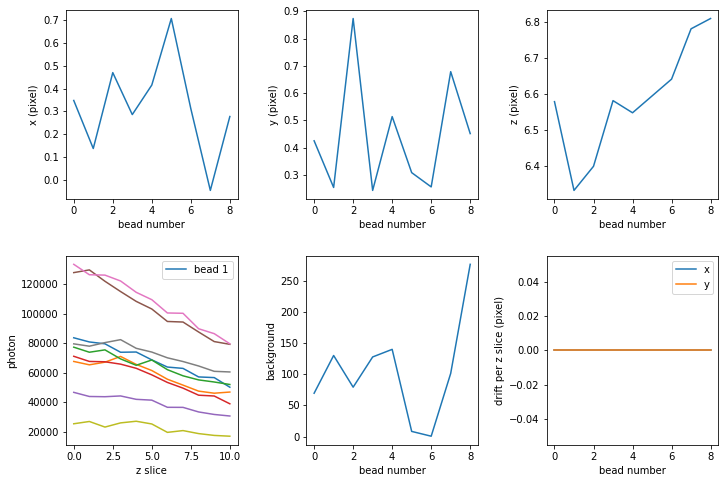

In [84]:
showlearnedparam(f,p)

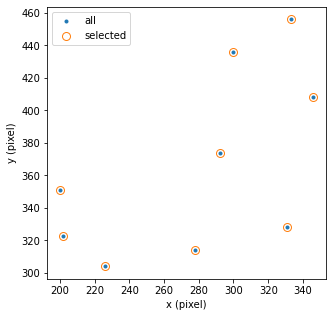

In [85]:
showcoord(f,p)

#### Ouput parameters

In [11]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['I_model', 'I_model_bead', 'I_model_reverse', 'apodization', 'bg', 'cor', 'cor_all', 'drift_rate', 'intensity', 'offset', 'pos', 'pupil', 'sigma', 'zernike_coeff', 'zernike_polynomial']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
